<a href="https://colab.research.google.com/github/Yashu3624/STROKE_PREDICTION/blob/main/STROKE_PRIDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"manojnasimhvadri","key":"3f6078c0ebea44de6d7a5fe57cfe1b56"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/apple-quality                                     Apple Quality                                      170KB  2024-01-11 14:31:07          10316        244  1.0              
shiivvvaam/top-youtuber-worldwide                                  Top YouTubers Worldwide                             83KB  2024-02-05 09:33:23            590         34  1.0              
hummaamqaasim/jobs-in-data                                         Jobs and Salaries in Data Science                   76KB  2023-12-25 20:03:32          15762        269  1.0              
saketk511/2019-2024-us-stock-market-data          

In [ ]:
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 64.7MB/s]


In [ ]:
! unzip stroke-prediction-dataset.zip -d stroke-prediction-dataset

Archive:  stroke-prediction-dataset.zip
  inflating: stroke-prediction-dataset/healthcare-dataset-stroke-data.csv  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.shape

(5110, 12)

In [ ]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

**Null Values**

In [ ]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

**Imbalance:**


In [ ]:
df['stroke'].value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [ ]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [ ]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [ ]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [ ]:
cat_cols = df[['smoking_status','Residence_type','work_type','ever_married','gender']]

In [ ]:
for col in cat_cols:
  lb=LabelEncoder()
  df[col]=lb.fit_transform(df[col])

In [ ]:
df.dtypes

id                     int64
gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object



*   BMI ranges
*   Below 18.5 - you're in the underweight between 18.5 and 24.9 - you're int he healthy weight range, between 25 and 29.9 - you're in the overweight range, between 30 and 39.9 - you're in the obese range



In [ ]:
df['bmi'].max()

97.6

In [ ]:
df['bmi'].min()

10.3

<Axes: ylabel='Frequency'>

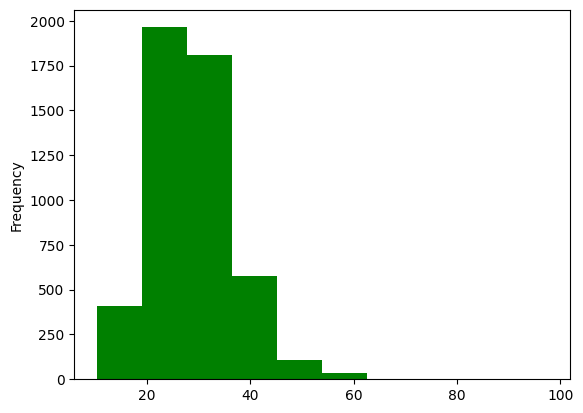

In [ ]:
df['bmi'].plot(kind = 'hist', color = 'g')

In [ ]:
df['bmi'].mean()

28.893236911794666

In [ ]:
df['bmi'].fillna(value = 28.89, inplace=True)

In [ ]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.shape

(5110, 12)

In [ ]:
x = df.drop('stroke', axis = 1).values
y = df['stroke'].values

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std = StandardScaler()
x = std.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state =100)

In [ ]:
x_train.shape

(3577, 11)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy_score(y_train, lr.predict(x_train))

0.726027397260274

In [ ]:
accuracy_score(y_test, y_pred)

0.7129810828440966

In [ ]:
confusion_matrix(y_test, y_pred)

array([[1034,  430],
       [  10,   59]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt = dt.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_using_decision_tree = round(accuracy_score(y_test, y_pred_dt)*100, 2)
print("Model accuracy using Decision Tree: ", accuracy_using_decision_tree, "%")

Model accuracy using Decision Tree:  90.67 %


In [67]:
from sklearn import svm
from sklearn.metrics import accuracy_score
svm = svm.SVC()
svm.fit(x_train, y_train)

SVC()

In [68]:
y_pred_svm = svm.predict(x_test)

In [69]:
accuracy_using_svm = round(accuracy_score(y_test, y_pred_svm)*100, 2)
print("Model accuracy using SVM: ", accuracy_using_svm, "%")

Model accuracy using SVM:  95.5 %


In [71]:
accuracy_score(y_train, svm.predict(x_train))

0.9496785015376014

Hyperparmeter tuning (Grid search)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


In [56]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Adjust based on overfitting/underfitting
    'kernel': ['linear', 'rbf', 'poly'],  # Choose based on data characteristics
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],  # Adjust based on data characteristics
}

In [57]:
svm_model = SVC(class_weight='balanced')


In [58]:
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)


In [59]:
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [60]:
print("Best Parameters: ", grid_search.best_params_)


Best Parameters:  {'C': 0.001, 'gamma': 'auto', 'kernel': 'poly'}


In [61]:
best_svm_model = grid_search.best_estimator_


In [62]:
y_pred_best_svm = best_svm_model.predict(x_test)
accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)


In [63]:
print("Model accuracy using the best SVM: {:.2f}%".format(accuracy_best_svm * 100))

Model accuracy using the best SVM: 91.45%
